# Libs and Modules

In [1]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 10.1 MB/s eta 0:00:00


In [2]:
!pip install demoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.1 MB/s eta 0:00:00


In [3]:
!pip install emoji --upgrade
#26 march latest

In [4]:
import pandas as pd
import json
import re
import string
import io
import demoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import emoji
from collections import Counter

# File upload and initial dataframes

In [5]:
def load_and_extract_data(file_paths):
    extracted_data_white = []
    extracted_data_latin = []
    extracted_data_asian = []
    extracted_data_african_american = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)

        for entry in data:
            user = entry.get('user', {})
            name = user.get('name', None)
            startUrl = entry.get('startUrl', None)
            location = user.get('location', None)
            description = user.get('description', None)
            full_text = entry.get('full_text', None)

            extracted_data = {
                'name': name,
                'startUrl': startUrl,
                'location': location,
                'description': description,
                'full_text': full_text
            }

            if 'White' in file_path:
                extracted_data_white.append(extracted_data)
            elif 'Latin' in file_path:
                extracted_data_latin.append(extracted_data)
            elif 'Asian' in file_path:
                extracted_data_asian.append(extracted_data)
            else:
                extracted_data_african_american.append(extracted_data)

    df_white = pd.DataFrame(extracted_data_white)
    df_latin = pd.DataFrame(extracted_data_latin)
    df_asian = pd.DataFrame(extracted_data_asian)
    df_african_american = pd.DataFrame(extracted_data_african_american)

    return df_white, df_latin, df_asian, df_african_american

file_paths = ['/content/White.json', '/content/Latin.json','/content/Asian.json','/content/African-American.json']
df_white, df_latin, df_asian, df_african_american = load_and_extract_data(file_paths)

In [6]:
print(df_white.shape)
print(df_latin.shape)
print(df_asian.shape)
print(df_african_american.shape)

(5923, 5)
(5915, 5)
(4948, 5)
(4987, 5)


In [7]:
df_white['startUrl'] = df_white['startUrl'].str.split('/').str[3]
df_latin['startUrl'] = df_latin['startUrl'].str.split('/').str[3]
df_asian['startUrl'] = df_asian['startUrl'].str.split('/').str[3]
df_african_american['startUrl'] = df_african_american['startUrl'].str.split('/').str[3]


In [8]:
df_white.head()

,name,startUrl,location,description,full_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,SGMTweetings,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...
1,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Donald Trump took away women’s freedom.\n\nI’m...
2,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Trump brags about overturning Roe v. Wade and ...
3,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in..."
4,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in..."


In [9]:
df_latin.head()

,name,startUrl,location,description,full_text
0,Astrid Galván,astridgalvan,"El Paso, TX",Editor at Axios Latino. Former AP reporter.,"🧵 In 42 minutes, Axios Latino is publishing a ..."
1,Latina Magazine,Latina,"New York, NY",https://t.co/VbTAKKmTsy \nStay connected to yo...,As part of our Women’s History Month campaign ...
2,Rep. Tony Cárdenas,RepCardenas,"San Fernando Valley, CA","Husband, father and grandfather. Proud to repr...",https://t.co/DUJAGQRkZy
3,Latina Magazine,Latina,"New York, NY",https://t.co/VbTAKKmTsy \nStay connected to yo...,.@CamilaCabello97 is our March/April 2017 cove...
4,Latina Magazine,Latina,"New York, NY",https://t.co/VbTAKKmTsy \nStay connected to yo...,20-year-old Cuban-born star @CamilaCabello97 d...


In [10]:
df_asian.head()

,name,startUrl,location,description,full_text
0,Steve Aoki,steveaoki,"ÜT: 34.075736,-118.301746",HiROQUEST 2: DOUBLE HELIX OUT NOW🧬,Big shoutout to @elonmusk for this insane truc...
1,Steve Aoki,steveaoki,"ÜT: 34.075736,-118.301746",HiROQUEST 2: DOUBLE HELIX OUT NOW🧬,got the gold for the wall!!!! Love u guys @BTS...
2,Steve Aoki,steveaoki,"ÜT: 34.075736,-118.301746",HiROQUEST 2: DOUBLE HELIX OUT NOW🧬,surpriseeee 😏we're back! got a new collab w/ m...
3,Steve Aoki,steveaoki,"ÜT: 34.075736,-118.301746",HiROQUEST 2: DOUBLE HELIX OUT NOW🧬,Here it is...the video you all deserve 💯 so pr...
4,Steve Aoki,steveaoki,"ÜT: 34.075736,-118.301746",HiROQUEST 2: DOUBLE HELIX OUT NOW🧬,Ooops I forgot to wear red and white @BTS_twt ...


In [11]:
df_african_american.head()

,name,startUrl,location,description,full_text
0,jus,bbnojutsu,Cashapp: $baiyulan,"when it get too serious, untag me!! dead ass!!...",a goddess ✨ https://t.co/nYCY7ahjv5
1,jus,bbnojutsu,Cashapp: $baiyulan,"when it get too serious, untag me!! dead ass!!...",um but the fl—
2,jus,bbnojutsu,Cashapp: $baiyulan,"when it get too serious, untag me!! dead ass!!...",why the cullens just didn't go to college. Goi...
3,jus,bbnojutsu,Cashapp: $baiyulan,"when it get too serious, untag me!! dead ass!!...",That is so traumatic. I know he’s laughing but...
4,jus,bbnojutsu,Cashapp: $baiyulan,"when it get too serious, untag me!! dead ass!!...",are the meals in the room with us right now


## Exploring the missing usernames during Apify scrape

In [12]:
white_names = df_white['startUrl'].unique()
print(len(white_names))
print(white_names)

73
['SGMTweetings' 'JoeBiden' 'arthurkwonlee' 'SpeakerPelosi' 'robertpjones'
 'LindseyGrahamSC' 'taylorswift13' 'BenLorber8' 'mel_buer' 'ThomasReeseSJ'
 'Madonna' 'billyjoel' 'TarantinoWorld' 'Eminem' 'TeresaWatanabe' None
 'jimmyfallon' 'chuckclose1' 'StephenKing' 'JeffKoons' 'SarahPalinUSA'
 'TomCruise' 'BradPaisley' 'JohnKasich' 't_NYC' 'SpeakerRyan'
 'DanaBashCNN' 'ShaniaTwain' 'ryangrim' 'prem_thakker' 'hasanthehun'
 'ArmedPatriot45' '1776Diva' 'Sweettalkin53' 'The__Sicilian'
 '1776patriot33' 'KendalllynnLynn' 'OWLM_' 'TheRISEofROD' 'WLM_NEW_YORK'
 'itismenewton' 'BelDane977' 'WLMCalifornia' 'AntiWhiteWatch1'
 'FolkPeaceVirtue' 'wlmglobal' 'makeeuropasnow' 'IamCherronesus'
 'SouthernMan872' 'denyndetec' 'joe__ureneck' 'seagloees' 'WLM_GB'
 'MarckeyzSocial' 'piedmontian11' 'WilliamA_33' 'TitaniaMcGrath'
 'bradleycoopermo' 'jk_rowling' 'TheRickWilson' 'EmmaWatson'
 'ConservativeTht' 'IvankaTrump' 'BillGates' 'LeoDiCaprio'
 'Leonarda_Jonie' 'OFalafel' 'JeremyCerone' 'EvaVlaar' 'ThisI

In [13]:
latin_names = df_latin['startUrl'].unique()
print(len(latin_names))
print(latin_names)

55
['astridgalvan' 'Latina' 'RepCardenas' 'AlexPadilla4CA' 'navamau'
 'lecumberry' 'AsmCervantes' None 'JoaquinCastrotx' 'LorenaSGonzalez'
 'chels_hylton' 'lachicamayra' 'TheJuanMarcano' 'JuanSaaa'
 'chiqui_delgado' 'Maria_Hinojosa' 'SahajKohli' 'KarinaVlaw'
 'latinovictoryus' 'EvaLongoria' 'votolatino' 'kdeleon' 'jdbalart'
 'aliciamenendez' 'RussContreras' 'doloreshuerta' 'arelisrhdz' 'monica'
 'lilianasegura' 'analydiamonaco' 'NBCLatino' 'cuchovivas' 'anaperezworld'
 'PabloReports' 'julito77' 'mlimongarza' 'michelleavillgs' 'jackiemontt'
 'ByJamesWagner' 'kramos1841' 'vmramos' 'Latinos4Ed' 'maria_hinojosa'
 'Nicolemarie_A' 'Veteran4Trump' 'GOPLatinosPA' 'AdrianaMaestas'
 'Latinos4lib' 'ALatinosUnited' 'LEJALatino' 'LatinosforNH' 'AspenLatinos'
 'Bez_Rengifo' 'AlfonsoforMI4' 'latinorebels']


In [14]:
asian_names = df_asian['startUrl'].unique()
print(len(asian_names))
print(asian_names)

59
['steveaoki' 'ourobororoboruo' 'NickCho' None 'JackMa' 'mirna_alsharif'
 'priyakrishna' 'IndianEmbassyUS' 'huntrsbae' 'jjesselizabethh'
 'angryasianman' 'wookjinlover' 'RepJudyChu' 'MEAIndia' 'd_jaishankar'
 'taaforg' 'the3rdkpopfan' 'younggyokim' 'melissa_816' '_Simplykpop'
 'Motabhai012' 'ranganathan_sr' 'elixirforyoo' 'warrior_soul13'
 'seamlessminds' 'LOV3NINA_' 'sidhant' 'seocjnkm' 'lisamjeong'
 'RealBababanaras' 'winteraphy' 'WinnKhuong' 'AndyKimNJ' 'DrHowardLiu'
 'firejennie' 'vijaygajera' 'Nungnicha' 'Blaykesimps1' 'jnkrated'
 'JiRongMFA' 'Swamy39' 'soloistyjm' 'joshuawongcf' 'AnimaAnandkumar'
 'techleadhd' 'michiokaku' 'drfeifei' 'AndrewYNg' 'demishassabis'
 'sundarpichai' 'satyanadella' 'xiangrenNLP' 'LisaSu' 'WuNeal'
 'VioletNPeng' 'WenhuChen' 'tmwilliamlin168' 'kaiwei_chang'
 'CodeFryingPan']


In [15]:
black_names = df_african_american['startUrl'].unique()
print(len(black_names))
print(black_names)

40
['bbnojutsu' 'SecondLifeDrake' '_jenniferopal' 'repjohnlewis' 'michyonce'
 'BariAWilliams' 'trvisXX' 'dereckapurnell' 'marviGmula' 'Basualdinero'
 'savonniee' 'Riasofinee' 'ManoRajuPD' 'Phil_Lewis_' 'Jxmmi'
 'selfmadetaay' 'MoneyMan' 'MalikaiUnique' 'sc' 'hazeleyes1685'
 'vinny_chic' 'maariahhmonique' '1776Railfan' 'SharikaSoal84'
 'RevRayCistman' 'POTUS44' 'KingJames' 'Money23Green' 'walkgoodetienne'
 '21savage' 'KaiCenat' 'YourRAGEz' 'LorennJames' 'himbo_chico' 'nantsuky'
 'thegentledyke' 'KevinHart4real' 'rheajason99' 'eji_org' 'thejacksonera']


In [16]:
white_drive_names = pd.read_csv(io.StringIO('''
Bigdog_1318
imaproudwhite
natioalist
whiteandproud
OWLM_
FLAGCONFEDERATE
JamesKuhn432214
mundt_scott
TheRISEofROD
ComfederateFlag
KendalllynnLynn
whiteferret74
White_Sips
itismenewton
ZeroWhiteGuilt
WLM_NEW_YORK
WLMCalifornia
wlmglobal
WLM_FLORIDA
WilliamA_33
BelDane977
makeeuropasnow
AntiWhiteWatch1
wlm_usa_idaho
FolkPeaceVirtue
SGMTweetings
ArmedPatriot45
Konner9_
Sweettalkin53
1776patriot33
The__Sicilian
ClaireDeclare
1776Diva
piedmontian11
WLMCalifornia
SouthernMan872
denyndetec
JUden99606580
SarahGr92554048
IamCherronesus
alexrs2k
seagloees
whiteAngel2316
WhiteLvsMttr
wlm_usa_idaho
WLM_GB
joe__ureneck
Bigdog_1318
WhiteLi68998993
WLMAustralia
WhiteL1vesMattr
whitesmattermor
whtelivesmatter
Whitesracism
MarckeyzSocial
MensMatter
'''), header=None)

In [17]:

latin_drive_names = pd.read_csv(io.StringIO('''
lachicamayra
lecumberry
chels_hylton
TheJuanMarcano
hmfv1
SandraLilley
Latinos4Ed
SuzGamboa
JuanSaaa
HenryRMunozIII
mariaggonzalez
Veteran4Trump
Nicolemarie_A
Maria_Hinojosa
SahajKohli
chiqui_delgado
EvaLongoria
chiqui_delgado
Latinos4lib
ismaelvillegas_
LEJALatino
GOPLatinosPA
AdrianaMaestas
ALatinosUnited
renato_macchi
LatinosforNH
analydiamonaco
AdrianSaenz
LATISM
AspenLatinos
AVourvoulias
foxnewslatino
alsyacevedo
PabloReports
julito77
SandraLilley
LatinoDecisions
NBCLatino
Bez_Rengifo
AlfonsoforMI4
cuchovivas
mlimongarza
michelleavillgs
anaperezworld
frankismartinez
KarinaVlaw
kdeleon
votolatino
latinovictoryus
jdbalart
latinorebels
RussContreras
jackiemontt
aliciamenendez
arelisrhdz
astridgalvan
bettinainclan
cearmario
doloreshuerta
gonzalez_hud
ByJamesWagner
jodyavallejo3
kramos1841
BeingLatino
lilianasegura
maria_hinojosa
monica
vmramos
'''), header=None)



In [18]:

asian_drive_names = pd.read_csv(io.StringIO('''
AndrewYNg
michiokaku
lixiaZ
sundarpichai
yicuistanford
LisaSu
drfeifei
amit_p
AnimaAnandkumar
demishassabis
ChengWeiChin1
satyanadella
MeiHongLab
techleadhd
tmwilliamlin168
WuNeal
VioletNPeng
xiangrenNLP
kaiwei_chang
WenhuChen
CodeFryingPan
steveaoki
ourobororoboruo
NickCho
JackMa
mirna_alsharif
priyakrishna
IndianEmbassyUS
huntrsbae
jjesselizabethh
angryasianman
wookjinlover
RepJudyChu
MEAIndia
d_jaishankar
taaforg
the3rdkpopfan
younggyokim
melissa_816
_Simplykpop
Motabhai012
ranganathan_sr
elixirforyoo
warrior_soul13
seamlessminds
LOV3NINA_
sidhant
seocjnkm
lisamjeong
RealBababanaras
winteraphy
WinnKhuong
AndyKimNJ
DrHowardLiu
firejennie
vijaygajera
Nungnicha
Blaykesimps1
jnkrated
JiRongMFA
Swamy39
soloistyjm
joshuawongcf
'''), header=None)

In [19]:

black_drive_names= pd.read_csv(io.StringIO('''
repjohnlewis
SecondLifeDrake
_jenniferopal
bbnojutsu
shaNoolde
MalikaiUnique
maariahhmonique
hazeleyes1685
sc
grimmkj
thejacksonera
vinny_chic
RevRayCistman
1776Railfan
SharikaSoal84
rheajason99
POTUS44
KingJames
Money23Green
walkgoodetienne
21savage
KaiCenat
YourRAGEz
BariAWilliams
ManoRajuPD
dereckapurnell
Phil_Lewis_
marviGmula
savonniee
Riasofinee
michyonce
Basualdinero
trvisXX
Jxmmi
BeScrappy1911
selfmadetaay
MoneyMan
eji_org
KevinHart4real
himbo_chico
LorennJames
thegentledyke
 nantsuky
'''), header=None)


In [20]:
white_drive_names = white_drive_names[0].values #changed datatype
latin_drive_names =latin_drive_names[0].values
asian_drive_names = asian_drive_names[0].values #changed datatype
black_drive_names =black_drive_names[0].values


white_apify_set = set(white_names)
latin_apify_set = set(latin_names)
asian_apify_set = set(asian_names)
black_apify_set = set(black_names)

white_set = set(white_drive_names)
latin_set = set(latin_drive_names)
asian_set = set(asian_drive_names)
black_set = set(black_drive_names)

non_matching_in_white = white_set -  white_apify_set
non_matching_in_latin = latin_set -  latin_apify_set
non_matching_in_asian = asian_set -  asian_apify_set
non_matching_in_black = black_set -  black_apify_set
# Print non-matching elements
print("Missing names white", non_matching_in_white)
print("Missing names latin", non_matching_in_latin)
print("Missing names asian", non_matching_in_asian)
print("Missing names black", non_matching_in_black)

Missing names white {'whiteferret74', 'FLAGCONFEDERATE', 'WhiteLvsMttr', 'whiteandproud', 'ClaireDeclare', 'Konner9_', 'mundt_scott', 'Whitesracism', 'ComfederateFlag', 'whtelivesmatter', 'JUden99606580', 'WLM_FLORIDA', 'whitesmattermor', 'JamesKuhn432214', 'SarahGr92554048', 'WhiteL1vesMattr', 'natioalist', 'MensMatter', 'WLMAustralia', 'White_Sips', 'whiteAngel2316', 'WhiteLi68998993', 'Bigdog_1318', 'wlm_usa_idaho', 'alexrs2k', 'ZeroWhiteGuilt', 'imaproudwhite'}
Missing names latin {'LATISM', 'bettinainclan', 'ismaelvillegas_', 'alsyacevedo', 'LatinoDecisions', 'SandraLilley', 'foxnewslatino', 'SuzGamboa', 'HenryRMunozIII', 'AVourvoulias', 'mariaggonzalez', 'gonzalez_hud', 'renato_macchi', 'AdrianSaenz', 'BeingLatino', 'hmfv1', 'cearmario', 'jodyavallejo3', 'frankismartinez'}
Missing names asian {'ChengWeiChin1', 'MeiHongLab', 'lixiaZ', 'amit_p', 'yicuistanford'}
Missing names black {'shaNoolde', 'BeScrappy1911', 'grimmkj', ' nantsuky'}


# Preprocess & EDA

Given the raw input Tweets, to obtain the same pre-processing output, users could employ our TweetNormalizer module.

Installation: pip3 install nltk emoji==0.6.0
The emoji version must be either 0.5.4 or 0.6.0. Newer emoji versions have been updated to newer versions of the Emoji Charts, thus not consistent with the one used for pre-processing our pre-training Tweet corpus.

To identify English Tweets,
we employ the language identification component of fastText (Joulin et al., 2017). We tokenize those English Tweets using “TweetTokenizer” from the NLTK toolkit (Bird et al.,
2009) and use the emoji package to translate
emotion icons into text strings (here, each icon
is referred to as a word token).

We also normalize the Tweets by converting user mentions and
web/url links into special tokens @USER and
HTTPURL, respectively. We filter out retweeted
Tweets and the ones shorter than 10 or longer
than 64 word tokens.

We use a “soft” normalization strategy to all of
the experimental datasets by translating word tokens of user mentions and web/url links into special tokens @USER and HTTPURL, respectively,
and converting emotion icon tokens into corresponding strings

## Remove Links

Removed example: Look the white.head() last row

In [21]:
def process_dataframe(df):
    def remove_http_urls(text):
        if isinstance(text, str):
            return re.sub(r'https?://\S*', '', text)
        return text

    df_processed = df.copy()
    df_processed['full_text_processed'] = df_processed['full_text'].apply(remove_http_urls)
    df_processed.drop(columns=['full_text'], inplace=True)
    return df_processed

In [22]:
df_prep_white = process_dataframe(df_white)
df_prep_latin = process_dataframe(df_latin)
df_prep_asian = process_dataframe(df_asian)
df_prep_afr_american = process_dataframe(df_african_american)

df_prep_white.head()


,name,startUrl,location,description,full_text_processed
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,SGMTweetings,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...
1,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Donald Trump took away women’s freedom.\n\nI’m...
2,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Trump brags about overturning Roe v. Wade and ...
3,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in..."
4,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in..."


## Used Hashtags

In [23]:
def extract_and_flatten_hashtags(df):
    hashtags = df['full_text_processed'].str.findall(r'#\w+')
    flat_hashtags = [tag.lower() for sublist in hashtags if sublist is not None for tag in sublist]
    return flat_hashtags

flat_hashtags_white = extract_and_flatten_hashtags(df_prep_white)
flat_hashtags_latin = extract_and_flatten_hashtags(df_prep_latin)
flat_hashtags_asian = extract_and_flatten_hashtags(df_prep_asian)
flat_hashtags_afr_american = extract_and_flatten_hashtags(df_prep_afr_american)

print('White hashtags: ',flat_hashtags_white)
print('Latin hashtags: ',flat_hashtags_latin)
print('Asian hashtags: ',flat_hashtags_asian)
print('African American hashtags: ',flat_hashtags_afr_american)

White hashtags:  ['#forthepeople', '#11', '#blacklivesmatter', '#jewishamericanheritagemonth', '#whitetoolong', '#nationalprayerbreakfast', '#johnsonamendment', '#avs2020', '#cnnsotu', '#rnc2020', '#qanon', '#whitetoolong', '#whitetoolong', '#electionday', '#whitetoolong', '#lgbtq', '#electionday', '#electionday', '#irandeal', '#whitetoolong', '#whitetoolong', '#holyland', '#israelpalestinewar', '#gazawar', '#jesuit', '#blacklivesmatter', '#jesuit', '#dreamers', '#daca', '#electionday', '#tigray', '#tigrayfamine', '#tigray', '#genocide', '#ethiopia', '#ethiopia', '#tigray', '#whitetoolong', '#popebenedictxvi', '#jesuits', '#tigray', '#evangelical', '#winner', '#starisborn', '#oscar', '#theparty', '#whitetoolong', '#electionresults2020', '#holiday', '#bitchplease', '#electionday', '#jesuit', '#labornotes2024', '#davidbanda', '#justiceforgeorgefloyd', '#michaeljackson', '#labornotes2024', '#cardinals', '#wecanworkitout', '#madonnacelebrationtour', '#stpatrickday', '#kamikaze', '#grammys'

In [24]:
def count_and_print_hashtags(hashtags_list, top_n=10):
    list_name = [name for name, var in globals().items() if var is hashtags_list][0]
    lowercase_hashtags = [tag.lower() for tag in hashtags_list]

    hashtag_counts = {}
    for tag in lowercase_hashtags:
        if tag in hashtag_counts:
            hashtag_counts[tag] += 1
        else:
            hashtag_counts[tag] = 1

    sorted_hashtag_counts = dict(sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True))

    print(f"List name: {list_name}")


    top_hashtags = []
    for i, (tag, count) in enumerate(sorted_hashtag_counts.items()):
        if i >= top_n:
            break
        print(f"{tag}: {count}")
        top_hashtags.append(tag)

    return '####################################'

In [25]:
print(count_and_print_hashtags(flat_hashtags_white,10))
print(count_and_print_hashtags(flat_hashtags_latin,10))
print(count_and_print_hashtags(flat_hashtags_asian,10))
print(count_and_print_hashtags(flat_hashtags_afr_american,10))

List name: flat_hashtags_white
#blackonwhiteviolence: 64
#whitelivesmatter: 59
#antiwhite: 57
#wlm: 56
#jeffkoons: 38
#fjb: 38
#btsonfallon: 32
#whiteandproud: 27
#art: 26
#missionimpossible: 26
####################################
List name: flat_hashtags_latin
#auroraco: 62
#venezuela: 60
#ad60: 37
#daca: 32
#puertorico: 32
#sisepuede: 23
#demdebate: 20
#vote: 16
#immigration: 16
#copolitics: 16
####################################
List name: flat_hashtags_asian
#simplykpop: 72
#china: 71
#ai: 66
#심플리케이팝: 57
#theboyz: 46
#더보이즈: 45
#케빈: 43
#kevin: 43
#제이콥: 42
#jacob: 42
####################################
List name: flat_hashtags_afr_american
#transwomenarewomen: 72
#proudtrans: 72
#transisbeautiful: 71
#goodtrouble: 36
#secondlife: 21
#tidalfacts: 20
#racialinjustice: 20
#1: 16
#metaverse: 12
#mchg: 12
####################################


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def remove_hashtags(hashtags_list):
    for i in range(len(hashtags_list)):
        hashtags_list[i] = hashtags_list[i].replace('#', '')

def create_wordcloud(hashtags_list):
    remove_hashtags(hashtags_list)
    text = ' '.join(hashtags_list).lower()
    if text:
        wordcloud = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate(text)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()
    else:
        print("No words found for generating a word cloud.")

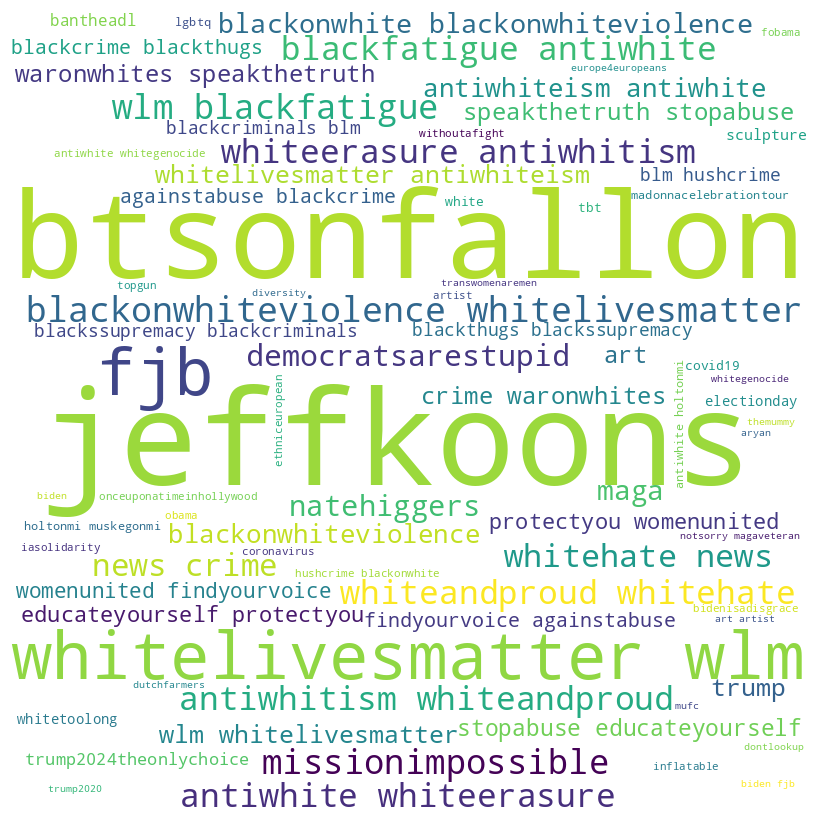

In [27]:
create_wordcloud(flat_hashtags_white)

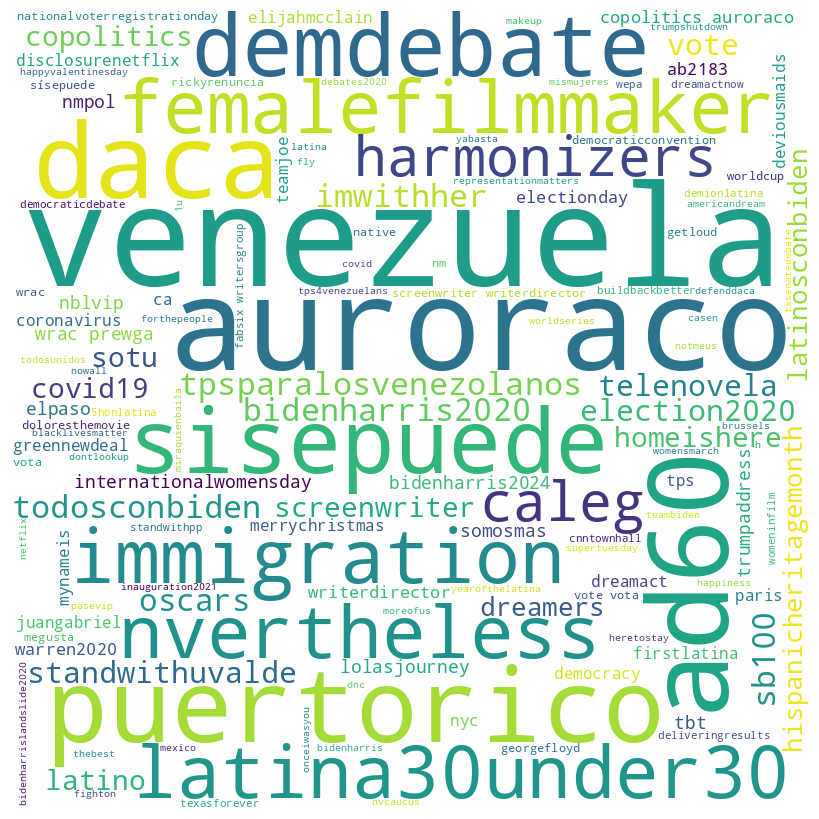

In [28]:
create_wordcloud(flat_hashtags_latin)

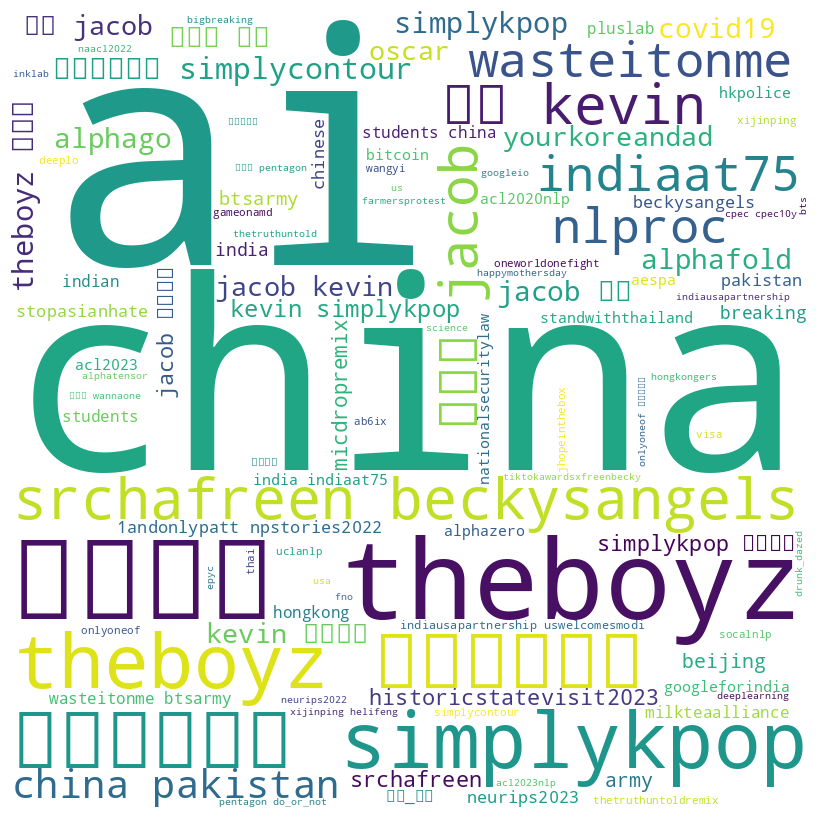

In [29]:
create_wordcloud(flat_hashtags_asian)

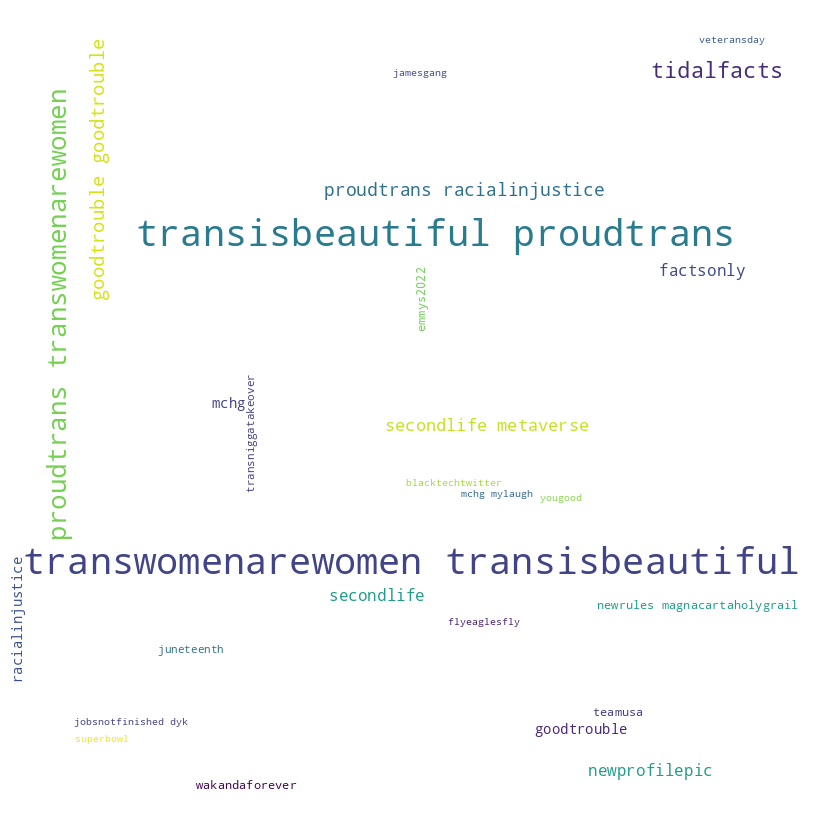

In [30]:
create_wordcloud(flat_hashtags_afr_american)

## Used Emoji

In [31]:
def extract_emojis(text):
    if text is None:
        return ''
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

def process_emojis(df):
    df_emojis = pd.DataFrame()
    for column in df.columns:
        df_emojis[column + '_emojis'] = df[column].apply(extract_emojis)

    all_emojis = ''.join(row for row in df_emojis.apply(lambda x: ''.join(x), axis=1))
    emoji_counts = Counter(all_emojis)
    return emoji_counts

emoji_counts_white = process_emojis(df_white)
print('White Emoji: ', emoji_counts_white)

emoji_counts_latin = process_emojis(df_latin)
print('Latin Emoji: ', emoji_counts_latin)

emoji_counts_asian = process_emojis(df_asian)
print('Asian Emoji: ', emoji_counts_asian)

emoji_counts_african_america = process_emojis(df_african_american)
print('African American Emoji: ', emoji_counts_african_america)

White Emoji:  Counter({'🚫': 807, '⚡': 729, '💎': 396, '👇': 334, '🤍': 332, '🏻': 258, '😁': 221, '⭐': 212, '✨': 211, '✝': 202, '🔥': 183, '🤣': 181, '🏼': 174, '😂': 165, '❄': 130, '👉': 124, '✊': 118, '❤': 117, '💋': 110, '🏴': 109, '🌟': 106, '💖': 104, '🛠': 102, '🗡': 101, '📦': 101, '👕': 101, '📙': 101, '📘': 101, '💍': 100, '🤠': 100, '🧃': 100, '🏕': 100, '🥀': 99, '🕊': 99, '™': 99, '🗣': 99, '🌿': 98, '🔫': 98, '👶': 98, '⚔': 96, '☀': 92, '👏': 66, '💜': 59, '🎉': 51, '❌': 46, '💥': 36, '📷': 35, '✔': 35, '💯': 35, '🚨': 32, '🙏': 31, '😏': 27, '🤔': 27, '♥': 22, '👑': 22, '😘': 22, '👍': 20, '💙': 18, '💛': 18, '🌈': 18, '🙌': 18, '😭': 17, '😳': 17, '🤷': 16, '💃': 16, '♀': 16, '🆘': 16, '🥰': 15, '💪': 15, '📍': 15, '🤡': 15, '©': 15, '🌹': 14, '🎅': 14, '🧨': 14, '➡': 13, '🎂': 13, '🙄': 13, '🎄': 13, '📸': 13, '\U0001fa75': 12, '🤯': 12, '🎁': 12, '⚫': 12, '🔁': 12, '💢': 12, '⛔': 12, '😆': 11, '🐐': 11, '🧈': 11, '😡': 11, '♂': 10, '\U0001faf6': 10, '‼': 10, '⚓': 10, '⚠': 10, '🔴': 10, '♦': 10, '🏠': 9, '😇': 9, '😉': 9, '🤬': 8, '🏿': 8, '\U00

### If you want to see the emojis inside the dataframe of that race.


In [32]:
df_emojis_white = pd.DataFrame()
for column in df_white.columns:
    df_emojis_white[column + '_emojis'] = df_white[column].apply(extract_emojis)
df_emojis_white.head(10)

,name_emojis,startUrl_emojis,location_emojis,description_emojis,full_text_emojis
0,,,,,🤬
1,,,,,
2,,,,,
3,,,,,
4,,,,,
5,,,,,
6,,,,,
7,,,,,
8,,,,,
9,,,,,


### Count of spesific emoji

In [33]:
specific_emoji = "🏴"
emoji_count = emoji_counts_white.get(specific_emoji, 0)
print(f"Count of {specific_emoji}: {emoji_count}")

Count of 🏴: 109


## Removing emojis or encoding

In [34]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)

In [35]:
def preprocess_text(text):
    if text is None:
        return ''

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    def replace_emoji(match):
        return " " + emoji.demojize(match.group(0)).replace(':', '') + " "

    text = re.sub(emoji_pattern, replace_emoji, text)
    text = ' '.join(text.split())
    return text

In [36]:
df_prep_latin['cleaned_text'] = df_prep_latin['full_text_processed'].apply(preprocess_text)
df_prep_white['cleaned_text'] = df_prep_white['full_text_processed'].apply(preprocess_text)
df_prep_asian['cleaned_text'] = df_prep_asian['full_text_processed'].apply(preprocess_text)
df_prep_afr_american['cleaned_text'] = df_prep_afr_american['full_text_processed'].apply(preprocess_text)


## Replace \\n with whitespace

In [37]:
def remove_newlines(df, column_name):
    df[column_name] = df[column_name].str.replace('\n', ' ')
    return df

df_prep_white = remove_newlines(df_prep_white, 'cleaned_text')
df_prep_latin = remove_newlines(df_prep_latin, 'cleaned_text')
df_prep_asian = remove_newlines(df_prep_asian, 'cleaned_text')
df_prep_afr_american = remove_newlines(df_prep_afr_american, 'cleaned_text')

## Deleting extra whitespaces

In [38]:
def replace_multiple_spaces(df, column_name):
    df[column_name] = df[column_name].str.replace(r'\s+', ' ')
    return df

# Example usage
df_prep_white = replace_multiple_spaces(df_prep_white, 'cleaned_text')
df_prep_latin = replace_multiple_spaces(df_prep_latin, 'cleaned_text')
df_prep_asian = replace_multiple_spaces(df_prep_asian, 'cleaned_text')
df_prep_afr_american = replace_multiple_spaces(df_prep_afr_american, 'cleaned_text')

df_prep_white.head()

,name,startUrl,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,SGMTweetings,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Donald Trump took away women’s freedom.\n\nI’m...,donald trump took away women’s freedom i’m fig...
2,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Trump brags about overturning Roe v. Wade and ...,trump brags about overturning roe v wade and m...
3,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in...",today an extreme abortion ban takes effect in ...
4,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in...",today an extreme abortion ban takes effect in ...


## Replace undurscore with whitespace

In [39]:
def remove_newlines(df, column_name):
    df[column_name] = df[column_name].str.replace('_', ' ')
    return df

df_prep_white = remove_newlines(df_prep_white, 'cleaned_text')
df_prep_latin = remove_newlines(df_prep_latin, 'cleaned_text')
df_prep_asian = remove_newlines(df_prep_asian, 'cleaned_text')
df_prep_afr_american = remove_newlines(df_prep_afr_american, 'cleaned_text')

In [40]:
df_prep_white.head()

,name,startUrl,location,description,full_text_processed,cleaned_text
0,𝕯𝖗 𝖔𝖋 𝕮𝖗𝖎𝖙𝖎𝖈𝖆𝖑 𝕭𝖆𝖘𝖘 𝕿𝖍𝖊𝖔𝖗𝖞,SGMTweetings,North Yorkshire,Phd in theories of critical bass. Ex junglist.,@ripx4nutmeg Dear @ThamesVP those young boys w...,ripx4nutmeg dear thamesvp those young boys wer...
1,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Donald Trump took away women’s freedom.\n\nI’m...,donald trump took away women’s freedom i’m fig...
2,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...",Trump brags about overturning Roe v. Wade and ...,trump brags about overturning roe v wade and m...
3,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in...",today an extreme abortion ban takes effect in ...
4,Joe Biden,JoeBiden,"Washington, DC","Husband to @DrBiden, proud father and grandfat...","Today, an extreme abortion ban takes effect in...",today an extreme abortion ban takes effect in ...


## Showing rows with less than 3 characters

In [41]:
print(df_prep_white.shape)
print(df_prep_afr_american.shape)

(5923, 6)
(4987, 6)


In [42]:
def filter_dataframe(df):
    filtered_df = df[df['cleaned_text'].str.len() < 3]
    df = df.drop(filtered_df.index)
    return df

df_prep_white = filter_dataframe(df_prep_white)
df_prep_latin = filter_dataframe(df_prep_latin)
df_prep_asian = filter_dataframe(df_prep_asian)
df_prep_afr_american = filter_dataframe(df_prep_afr_american)

In [43]:
print(df_prep_white.shape)
print(df_prep_afr_american.shape)

(5801, 6)
(4929, 6)


# Merge dataframes

In [44]:
df_prep_white['race'] = 'white'
df_prep_latin['race'] = 'latin'
df_prep_asian['race'] = 'asian'
df_prep_afr_american['race'] = 'afr_amr'

In [45]:
print(df_prep_white.shape)
print(df_prep_latin.shape)
print(df_prep_asian.shape)
print(df_prep_afr_american.shape)

(5801, 7)
(5852, 7)
(4870, 7)
(4929, 7)


In [46]:
df_merged = pd.concat([df_prep_white, df_prep_latin,df_prep_asian,df_prep_afr_american], ignore_index=True)
columns_to_drop = ['name', 'location', 'description','full_text_processed']
df_merged = df_merged.drop(columns=columns_to_drop)
print(df_merged.shape)
df_merged.head()

(21452, 3)


,startUrl,cleaned_text,race
0,SGMTweetings,ripx4nutmeg dear thamesvp those young boys wer...,white
1,JoeBiden,donald trump took away women’s freedom i’m fig...,white
2,JoeBiden,trump brags about overturning roe v wade and m...,white
3,JoeBiden,today an extreme abortion ban takes effect in ...,white
4,JoeBiden,today an extreme abortion ban takes effect in ...,white


In [47]:
df_merged.tail()

,startUrl,cleaned_text,race
21447,thejacksonera,examples of “aave” aka ebonics are dig bad str...,afr_amr
21448,thejacksonera,louderrrrrr,afr_amr
21449,thejacksonera,my mcm wrote your faves song in 45 minutes smi...,afr_amr
21450,thejacksonera,its incredible to see young girls like zendaya...,afr_amr
21451,thejacksonera,jacksonnfamily thank you rose,afr_amr


# Advanced Methods for predicttion

efore applying BPE to the pre-training corpus of English Tweets, we tokenized these Tweets using TweetTokenizer from the NLTK toolkit and used the emoji package to translate emotion icons into text strings (here, each icon is referred to as a word token). We also normalized the Tweets by converting user mentions and web/url links into special tokens @USER and HTTPURL, respectively. Thus it is recommended to also apply the same pre-processing step for BERTweet-based downstream applications w.r.t. the raw input Tweets.

Given the raw input Tweets, to obtain the same pre-processing output, users could employ our TweetNormalizer module.

Installation: pip3 install nltk emoji==0.6.0
The emoji version must be either 0.5.4 or 0.6.0. Newer emoji versions have been updated to newer versions of the Emoji Charts, thus not consistent with the one used for pre-processing our pre-training Tweet corpus.

from TweetNormalizer import normalizeTweet


In [48]:
print(df_merged.isnull().sum())

startUrl        0
cleaned_text    0
race            0
dtype: int64


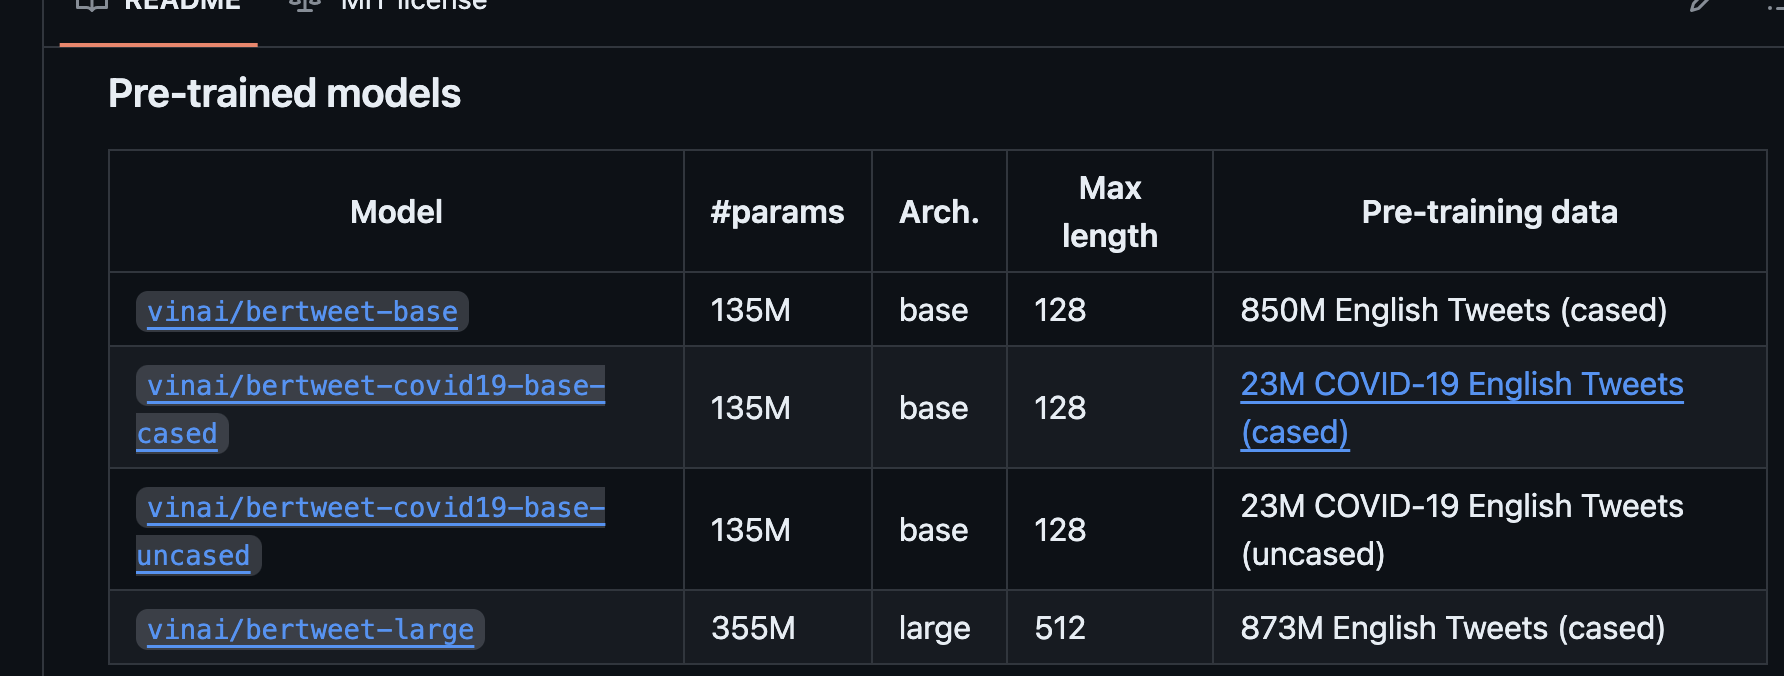

Install transformers with pip: pip install transformers, or install transformers from source.
Note that we merged a slow tokenizer for BERTweet into the main transformers branch. The process of merging a fast tokenizer for BERTweet is in the discussion, as mentioned in this pull request. If users would like to utilize the fast tokenizer, the users might install transformers as follows:
git clone --single-branch --branch fast_tokenizers_BARTpho_PhoBERT_BERTweet https://github.com/datquocnguyen/transformers.git
cd transformers
pip3 install -e .

In [49]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 13.9 MB/s eta 0:00:00


In [50]:
!pip install transformers
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
import optuna

In [51]:
model = AutoModel.from_pretrained("vinai/bertweet-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", normalization=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

We employ the transformers library (Wolf
et al., 2019) to independently fine-tune BERTweet
for each task and each dataset in 30 training
epochs. We use AdamW (Loshchilov and Hutter, 2019) with a fixed learning rate of 1.e-5 and
a batch size of 32 (Liu et al., 2019). We compute
the task performance after each training epoch on
the validation set (here, we apply early stopping
when no improvement is observed after 5 continuous epochs)

each pre-trained language model the “soft” scores
are generally higher than the corresponding “hard”
scores, i.e. applying lexical normalization dictionaries to normalize word tokens in Tweets generally does not help improve the performance of the
pre-trained language models on downstream tasks

In [52]:
#dataset object that can be passed to a PyTorch DataLoader for batching and iterating over
#handles the tokenization and encoding of text inputs using the provided tokenizer
class CustomDataset(Dataset):

    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx]) #ensure that the text is in a format that can be processed by the tokenizer.
        target = self.targets[idx]
        try:
            encoding = self.tokenizer.encode_plus(
            text, #This is the input text that we want to encode.
            add_special_tokens=True, #This parameter specifies that special tokens like [CLS] (start of sequence) and [SEP] (end of sequence) should be added to the input text. These tokens are required for RoBERTa.
            max_length=self.max_len, #f the input text is longer than this length, it will be truncated. If it is shorter, it will be padded.
            return_token_type_ids=None,  # DIfferent than bert, Make sure no token type IDs are returned as they are not required for RoBERTa
            padding='max_length',
            truncation=True,
            return_attention_mask=True,#The attention mask is a binary mask indicating which tokens are actual words and which are padding tokens.
            return_tensors='pt' #specifies that the output should be returned as PyTorch tensors ('pt').
            )

            return {
                'input_ids': encoding['input_ids'].flatten(),#token IDs of the input text.
                'attention_mask': encoding['attention_mask'].flatten(),# which indicates which tokens are real words and which are padding tokens.
                'targets': torch.tensor(target, dtype=torch.long) #integer
            }
        except KeyError as e:
            print(f"Index Error: {idx} not found.")
            raise


In [53]:
print(df_merged['race'].unique())
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_merged['race'] = le.fit_transform(df_merged['race'])

print(df_merged['race'].unique())

['white' 'latin' 'asian' 'afr_amr']
[3 2 1 0]


In [54]:
from torch.nn.utils.rnn import pad_sequence
#combine a batch of samples into a single batch
def custom_collate_fn(batch):
  input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True) #pad the sequences to the same length.
  attention_masks = pad_sequence([item['attention_mask'] for item in batch], batch_first=True)#same as above but for the 'attention_mask'.
  targets = torch.stack([item['targets'] for item in batch]) #extracts the 'targets' from each item in the batch and then stacks them into a single tensor
  return {'input_ids': input_ids, 'attention_mask': attention_masks, 'targets': targets} #eturns a dictionary containing the padded input IDs, attention masks, and targets as a single batch

In [55]:
df_full_train, df_test = train_test_split(df_merged, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)


#80-10-10


df_train = df_train.reset_index(drop=True)#reset the index of a DataFrame, drop the old index and replace it with a new sequential index
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Best parameters from tuning
BATCH_SIZE = 8
LEARNING_RATE = 1e-5
DROPOUT_RATE = 0.2
WARMUP_STEPS = 0
MAX_LEN = 128

train_data = CustomDataset(df_train['cleaned_text'], df_train['race'], tokenizer, MAX_LEN)
val_data = CustomDataset(df_val['cleaned_text'], df_val['race'], tokenizer, MAX_LEN)
test_data = CustomDataset(df_test['cleaned_text'], df_test['race'], tokenizer, MAX_LEN)

#data loader batching automatically batches the data, which means it combines individual samples into batches
#GPUs can process batches of data faster than individual samples.
#shuffle for ensure that the model doesn't learn the order of the data
#DataLoader takes care of loading the data in parallel,
#collate_fn for if samples have different sizes or structures.
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate_fn)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn)

In [56]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: cuda


In [57]:
from torch import nn
from torch.optim import Adam
from transformers import get_linear_schedule_with_warmup
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

with torch.no_grad():
    features = bertweet(input_ids)  # Models outputs are now tuples


https://github.com/VinAIResearch/BERTweet/blob/e36876c673438159de0233e9b1e9eee61d8902b3/README.md?plain=1#L78

In [58]:
EPOCHS = 100

In [59]:
class RaceClassifier(nn.Module):

    def __init__(self, n_classes, drop_rate=DROPOUT_RATE):
        super(RaceClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained("vinai/bertweet-base")
        self.drop = nn.Dropout(p=drop_rate) #can be changed in future
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) #linear layer for the output with the number of classes

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        last_hidden_state = bert_output[0]
        pooled_output = last_hidden_state[:, 0]
        output = self.drop(pooled_output)
        return self.out(output)

n_classes = len(df_merged['race'].unique()) #4 races
model = RaceClassifier(n_classes)
model = model.to(device) #passed to gpu


#higher weights to the minority class
class_weights = compute_class_weight('balanced', classes=np.unique(df_train.race), y=df_train.race) #computed based on the class distribution in the training dataset
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)#measures the performance of a classification model whose output is a probability value between 0 and 1
optimizer = Adam(model.parameters(), lr=LEARNING_RATE) # need  look at the paper for proper param

#will be used by step function
scheduler = get_linear_schedule_with_warmup( #prevent the model from diverging early on.
  optimizer,
  num_warmup_steps=WARMUP_STEPS,
  num_training_steps=len(train_dataloader) * EPOCHS
)

## Result

### Hyperparameter Tuning Part

In [ ]:
from transformers import AutoModel, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm


In [ ]:
def train_and_evaluate_model(trial, train_dataloader, val_dataloader, device, num_epochs, n_classes):
    # Define the hyperparameters
    learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-4, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64])
    warmup_steps = trial.suggest_int('warmup_steps', 0, 500)

    model = RaceClassifier(n_classes=n_classes, drop_rate=dropout_rate).to(device)

    optimizer = AdamW(model.parameters(), lr=learning_rate)
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=len(train_dataloader) * num_epochs
    )

    class_weights = compute_class_weight('balanced', classes=np.unique(df_train.race), y=df_train.race)
    weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        # Train
        model.train()
        for _, data in enumerate(tqdm(train_dataloader)):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            targets = data['targets'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

        model.eval()
        val_loss = 0.0
        for _, data in enumerate(val_dataloader):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            targets = data['targets'].to(device)

            with torch.no_grad():
                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_dataloader)

        trial.report(avg_val_loss, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss

    return best_val_loss

In [ ]:
def objective(trial):
    max_len = 128
    train_dataset = CustomDataset(df_train['cleaned_text'], df_train['race'], tokenizer, max_len)
    val_dataset = CustomDataset(df_val['cleaned_text'], df_val['race'], tokenizer, max_len)

    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64])
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

    return train_and_evaluate_model(trial, train_dataloader, val_dataloader, device, num_epochs=3, n_classes=n_classes)


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_trial = study.best_trial
print(f"Best trial final loss value: {best_trial.value}")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

[I 2024-06-05 10:53:24,728] A new study created in memory with name: no-name-ab1f60e6-f0fd-4c4e-b3fa-eac123d42a82
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 403/403 [01:09<00:00,  5.82it/s]
[I 2024-06-05 10:57:22,758] Trial 0 finished with value: 1.0669255490656253 and parameters: {'batch_size': 32, 'learning_rate': 1.392926322957844e-06, 'dropout_rate': 0.3555462378948522, 'warmup_steps': 117}. Best is trial 0 with value: 1.0669255490656253.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to

Best trial final loss value: 0.5821258481383823
batch_size: 8
learning_rate: 1.3532296017163483e-05
dropout_rate: 0.1641140999178555
warmup_steps: 498


### Train Part


Epoch: 1/100, Train Loss:  0.923
Train Accuracy: 62.77 %
Validation Loss: 0.723



Epoch: 2/100, Train Loss:  0.621
Train Accuracy: 77.53 %
Validation Loss: 0.629



Epoch: 3/100, Train Loss:  0.438
Train Accuracy: 84.89 %
Validation Loss: 0.591



Epoch: 4/100, Train Loss:  0.285
Train Accuracy: 90.89 %
Validation Loss: 0.634



Epoch: 5/100, Train Loss:  0.185
Train Accuracy: 94.32 %
Validation Loss: 0.649



Epoch: 6/100, Train Loss:  0.129
Train Accuracy: 96.20 %
Validation Loss: 0.732



Epoch: 7/100, Train Loss:  0.092
Train Accuracy: 97.20 %
Validation Loss: 0.773



Epoch: 8/100, Train Loss:  0.073
Train Accuracy: 97.82 %
Validation Loss: 0.806



Epoch: 9/100, Train Loss:  0.058
Train Accuracy: 98.31 %
Validation Loss: 0.862
Early stopping


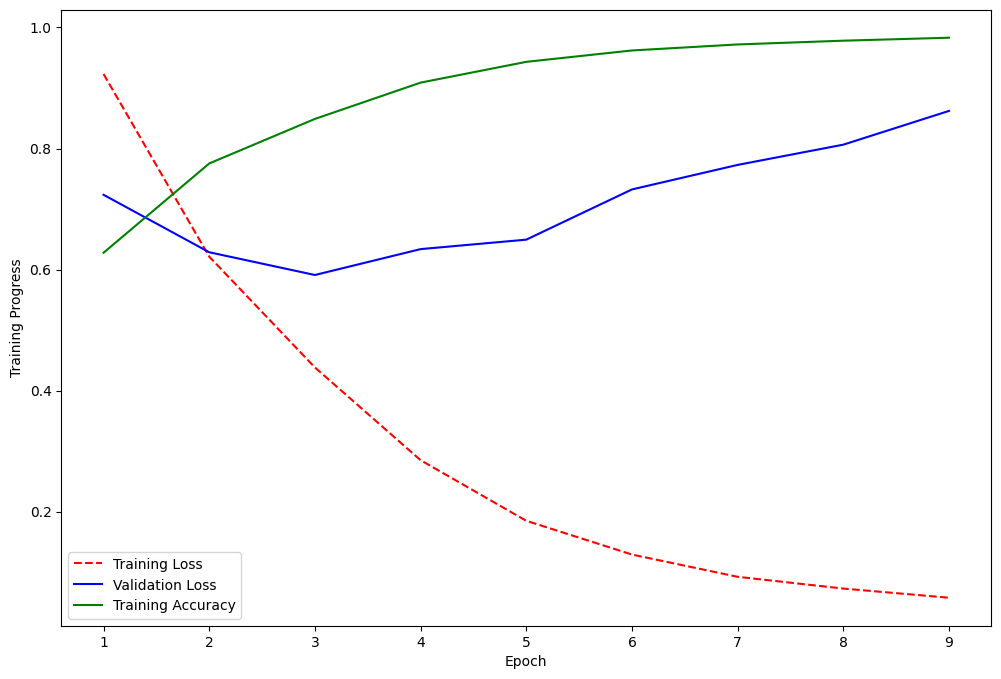

In [60]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

PATIENCE = 5  # number of epochs to wait before stopping, same as the paper berttweet

train_loss_values = []
val_loss_values = []
accuracy_values = []

best_loss = np.inf
patience_counter = 0

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    correct_predictions = 0
    total = 0

    for _, data in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{EPOCHS}', leave=False)):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    average_train_loss = train_loss / len(train_dataloader)
    train_accuracy = correct_predictions / total

    train_loss_values.append(average_train_loss)
    accuracy_values.append(train_accuracy)

    print(f'\nEpoch: {epoch+1}/{EPOCHS}, Train Loss:  {average_train_loss:.3f}')
    print('Train Accuracy: {:.2f} %'.format(100 * train_accuracy))

    # Validation
    val_loss = 0
    model.eval()

    with torch.no_grad():
        for _, data in enumerate(val_dataloader):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            labels = data['targets'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

    average_val_loss = val_loss / len(val_dataloader)
    val_loss_values.append(average_val_loss)
    print(f'Validation Loss: {average_val_loss:.3f}')

    # Check for early stopping
    if average_val_loss < best_loss:
        best_loss = average_val_loss
        patience_counter = 0  # Reset counter
        torch.save(model.state_dict(), 'best_model.pt')

    else:
        patience_counter += 1

    if patience_counter > PATIENCE:
        print("Early stopping")
        break

epoch_count = range(1, len(train_loss_values) + 1)
model.load_state_dict(torch.load('best_model.pt'))

plt.figure(figsize=(12, 8))
plt.plot(epoch_count, train_loss_values, 'r--')
plt.plot(epoch_count, val_loss_values, 'b-')
plt.plot(epoch_count, accuracy_values, 'g-')
plt.legend(['Training Loss', 'Validation Loss', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Progress')
plt.show();

### Test Set

In [62]:
import torch
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Your model evaluation code
model.eval()
test_loss = 0
correct_predictions = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for _, data in enumerate(test_dataloader):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['targets'].to(device)

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = correct_predictions / total
num_test_tweets = len(df_test)
incorrect_predictions = [(text, label, pred) for text, label, pred in zip(df_test['cleaned_text'], all_labels, all_predictions) if label != pred]

print(f'Number of tweets in the test set: {num_test_tweets}')
num_incorrect_predictions = len(incorrect_predictions)
print(f'Number of incorrect predictions: {num_incorrect_predictions}\n')
print(f'\nTest Loss: {average_test_loss:.3f}')
print('Test Accuracy: {:.2f} %'.format(100 * test_accuracy))

label_mapping = {0: 'afr_amr', 1: 'asian',2: 'latin', 3:'white'}
all_predictions_str = [label_mapping[pred] for pred in all_predictions]
all_labels_str = [label_mapping[label] for label in all_labels]

# Display incorrect predictions
incorrect_predictions = [(text, actual, pred) for text, actual, pred in zip(df_test['cleaned_text'], all_labels_str, all_predictions_str) if actual != pred]
print("\nIncorrect Predictions:")
for text, actual, pred in incorrect_predictions:
    print(f"Text: {text}\nActual: {actual}\nPredicted: {pred}\n")

# Calculate additional metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
classification_rep = classification_report(all_labels, all_predictions, target_names=list(label_mapping.values()))
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Number of tweets in the test set: 4291
Number of incorrect predictions: 894


Test Loss: 0.639
Test Accuracy: 79.17 %

Incorrect Predictions:
Text: im joining the new york times food desk this is a dream job one that i hope will not only allow me to tell great stories and film more video but bring new voices into the fold at the times its beena year and im feeling really grateful today
Actual: asian
Predicted: latin

Text: those old nyc prewar apartments are designed that way so you open the windows in the winter and create cross ventilation the buildings were designed that way in direct response to 1918 pandemic and understanding airborne spread
Actual: white
Predicted: latin

Text: nypost black supremacists
Actual: white
Predicted: latin

Text: the application for community project funding is now live and due on april 28 at 9 pm for more information on whether you qualify for the criteria visit my website at
Actual: latin
Predicted: asian

Text: me around the bad bitches
Actual: asia

## Test with unseen data

### Predicting the labels

In [63]:
model.load_state_dict(torch.load('best_model.pt', map_location=device))
model.eval()

def text_to_loader(tokenizer, texts, max_len):
    encoding = tokenizer(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    return [{
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
    }]

def predict(model, dataloader):
    model = model.eval()
    predictions = []

    with torch.no_grad():
        for item in dataloader:
            input_ids = item['input_ids'].to(device)
            attention_mask = item['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds)

    return [le.inverse_transform([pred.item()])[0] for pred in predictions]  # Invert the predicted labels



In [64]:
unseen_texts = ["i love wearing wife-beaters"]
true_labels = ["afr_amr"]

MAX_LEN = 100
test_dataloader = DataLoader(text_to_loader(tokenizer, unseen_texts, MAX_LEN), batch_size=1)

predictions = predict(model, test_dataloader)

for text, true, pred in zip(unseen_texts, true_labels, predictions):
    print(f'Text: {text}')
    print(f'Predicted: {pred}, Actual: {true}\n')

Text: i love wearing wife-beaters
Predicted: afr_amr, Actual: afr_amr



### Giving probs for labels

In [65]:
def predict_probabilities(model, dataloader):
    model = model.eval()
    all_probs = []

    with torch.no_grad():
        for item in dataloader:
            input_ids = item['input_ids'].to(device)
            attention_mask = item['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            all_probs.append(probs)

    return all_probs
probabilities = predict_probabilities(model, test_dataloader)

In [66]:
unseen_texts = ["i love wearing wife-beaters"]
true_labels = ["afr_amr"]

In [67]:
for text, true, probs in zip(unseen_texts, true_labels, probabilities):
    label_probs = {le.inverse_transform([i])[0]: prob.item() for i, prob in enumerate(probs[0])}
    print(f'Text: {text}')
    print(f'Label Probabilities: {label_probs}, Actual: {true}\n')

Text: i love wearing wife-beaters
Label Probabilities: {'afr_amr': 0.9552287459373474, 'asian': 0.009177049621939659, 'latin': 0.010163107886910439, 'white': 0.02543109655380249}, Actual: afr_amr



### Multiple sentence

In [68]:
# Sample sentences
sentences = [
#Latin
"I am Latinx.",
"I come from a Latin American country.",
"I speak Spanish/Portuguese.",
"I enjoy Latin cuisine.",
"I celebrate Latin cultural traditions.",
"I am proud of my Latin heritage.",
"I identify with Latin music and dance.",
"I value family and community.",
"I embrace the diversity within Latin culture.",
"I am fluent in both English and Spanish/Portuguese.",
#White:
"I am white.",
"I come from a European background.",
"I have fair skin.",
"I enjoy traditional European cuisine.",
"I celebrate European cultural traditions.",
"I am proud of my European heritage.",
"I identify with European history and art.",
"I value individualism and independence.",
"I appreciate the diversity within white culture.",
"I am fluent in English.",
#African-American:
"I am African-American.",
"I come from African descent.",
"I have a rich cultural heritage.",
"I celebrate African-American cultural traditions.",
"I am proud of my African-American heritage.",
"I identify with African-American music and art.",
"I value resilience and strength.",
"I appreciate the diversity within the African-American community.",
"I strive for equality and justice.",
"I am fluent in English.",
#Asian:
"I am Asian.",
"I come from an Asian country.",
"I speak an Asian language.",
"I enjoy Asian cuisine.",
"I celebrate Asian cultural traditions.",
"I am proud of my Asian heritage.",
"I identify with Asian philosophy and spirituality.",
"I value education and hard work.",
"I appreciate the diversity within Asian cultures.",
"I am fluent in both English and an Asian language."
]

# Corresponding expected races
expected_races = [
    "latin", "latin", "latin", "latin", "latin", "latin", "latin", "latin", "latin", "latin",
    "white", "white", "white", "white", "white", "white", "white", "white", "white", "white",
    "afr_amr", "afr_amr", "afr_amr", "afr_amr", "afr_amr", "afr_amr", "afr_amr", "afr_amr", "afr_amr", "afr_amr",
    "asian", "asian", "asian", "asian", "asian", "asian", "asian", "asian", "asian", "asian"
]

encoded_sentences = tokenizer(
    sentences,
    padding=True,
    truncation=True,
    return_tensors='pt',
    max_length=MAX_LEN,
)

input_ids = encoded_sentences["input_ids"].to(device)
attention_mask = encoded_sentences["attention_mask"].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    predictions = torch.argmax(outputs, dim=1)
    predictions = predictions.cpu().numpy()

predicted_labels = le.inverse_transform(predictions)
label_counts = {}
correct_counts = {}

for label in le.classes_:
    label_counts[label] = 0
    correct_counts[label] = 0

for pred, expected in zip(predicted_labels, expected_races):
    label_counts[expected] += 1
    if pred == expected:
        correct_counts[expected] += 1

print("True Prediction Ratios:")
for label in le.classes_:
    correct_predictions = correct_counts[label]
    total_predictions = label_counts[label]
    ratio = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    print(f"{label}: {ratio:.2f}% (Total: {total_predictions}, Correct: {correct_predictions})")

print("\nIndividual Predictions:")

for i, (sentence, prediction, expected_race) in enumerate(zip(sentences, predicted_labels, expected_races)):
    print(f"Sentence {i+1}: '{sentence}'")
    print(f"Predicted: {prediction}, Expected: {expected_race}\n")


True Prediction Ratios:
afr_amr: 80.00% (Total: 10, Correct: 8)
asian: 90.00% (Total: 10, Correct: 9)
latin: 90.00% (Total: 10, Correct: 9)
white: 60.00% (Total: 10, Correct: 6)

Individual Predictions:
Sentence 1: 'I am Latinx.'
Predicted: latin, Expected: latin

Sentence 2: 'I come from a Latin American country.'
Predicted: latin, Expected: latin

Sentence 3: 'I speak Spanish/Portuguese.'
Predicted: latin, Expected: latin

Sentence 4: 'I enjoy Latin cuisine.'
Predicted: latin, Expected: latin

Sentence 5: 'I celebrate Latin cultural traditions.'
Predicted: latin, Expected: latin

Sentence 6: 'I am proud of my Latin heritage.'
Predicted: latin, Expected: latin

Sentence 7: 'I identify with Latin music and dance.'
Predicted: latin, Expected: latin

Sentence 8: 'I value family and community.'
Predicted: afr_amr, Expected: latin

Sentence 9: 'I embrace the diversity within Latin culture.'
Predicted: latin, Expected: latin

Sentence 10: 'I am fluent in both English and Spanish/Portuguese.

In [69]:
sentences = [
	"30 DAYS: The Kai Cenat Documentary OUT NOW"
	"7 Days In Is officially over appreciate everyone who took the time to watch and support love y’all to the fullest"
"BUSTDOWN ROLLIE AVALANCHE OUT NOW @Nlechoppa1"
"4	WE ARE GOING TO UNIVERSAL RIGHT NOW WITH @xQc"
"Please Stop With The RIZZ TIKTOKS….Missed When Only A Few Knew About it"
]

encoded_sentences = tokenizer(
    sentences,
    padding=True,
    truncation=True,
    return_tensors='pt',
    max_length=MAX_LEN,
)

input_ids = encoded_sentences["input_ids"].to(device)
attention_mask = encoded_sentences["attention_mask"].to(device)

# Make predictions
model.eval()  # Make sure the model is in evaluation mode
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    predictions = torch.argmax(outputs, dim=1)
    predictions = predictions.cpu().numpy()  # Move predictions to the CPU

# Convert predictions index to class label
predicted_labels = le.inverse_transform(predictions)

# Check the predicted race
expected_race = "afr_amr"
expected_label = le.transform([expected_race])[0]

# Compare and display results
for i, prediction in enumerate(predicted_labels):
    actual_class = le.inverse_transform([expected_label])[0] if expected_label in predictions else "Other Class"
    print(f"Sentence {i+1}: '{sentences[i]}'")
    print(f"Predicted: {prediction}, Expected: {actual_class}\n")

Sentence 1: '30 DAYS: The Kai Cenat Documentary OUT NOW7 Days In Is officially over appreciate everyone who took the time to watch and support love y’all to the fullestBUSTDOWN ROLLIE AVALANCHE OUT NOW @Nlechoppa14	WE ARE GOING TO UNIVERSAL RIGHT NOW WITH @xQcPlease Stop With The RIZZ TIKTOKS….Missed When Only A Few Knew About it'
Predicted: afr_amr, Expected: afr_amr

